In [16]:
"Hacemos los imports necesarios, y permitimos a collab acceder al archivo de drive "
import pandas as pd 
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Análisis de Popularidad de Canciones
Este notebook explora cómo analizar datos relacionados con la popularidad de canciones utilizando técnicas de visualización y manipulación de datos.

In [17]:
"Leemos el csv y lo 'limpiamos' aunque viene con los datos en perfecto estado lo único que haremos será dividir la variable popularity entre 100 para posteriormente facilitar el trabajo "
df=pd.read_csv('/content/drive/Shareddrives/6_pr4/data.csv')
df.drop(columns=["id"], inplace=True)
df.popularity=df.popularity.div(100)
df.head(-20)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982000,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",0.04,1921,0.0366,80.954
1,0.9630,1921,0.732000,['Dennis Day'],0.819,180533,0.341,0,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,0.05,1921,0.4150,60.936
2,0.0394,1921,0.961000,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,0.913000,3,0.1010,-14.850,1,Gati Bali,0.05,1921,0.0339,110.339
3,0.1650,1921,0.967000,['Frank Parker'],0.275,210000,0.309,0,0.000028,5,0.3810,-9.316,1,Danny Boy,0.03,1921,0.0354,100.109
4,0.2530,1921,0.957000,['Phil Regan'],0.418,166693,0.193,0,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,0.02,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170628,0.3230,2020,0.000206,['Miley Cyrus'],0.407,290768,0.872,0,0.045100,7,0.1270,-5.001,1,Zombie (Live from the NIVA Save Our Stages Fes...,0.71,2020-10-23,0.0354,164.000
170629,0.6910,2020,0.040600,"['Rauw Alejandro', 'Camilo']",0.721,222680,0.637,0,0.000000,9,0.0525,-5.134,1,Tattoo - Remix with Camilo,0.71,2020-11-13,0.2860,193.922
170630,0.6590,2020,0.002480,"['DVBBS', 'Quinn XCII']",0.714,150819,0.798,0,0.000678,5,0.1030,-4.239,0,West Coast (feat. Quinn XCII),0.67,2020-10-16,0.0612,119.017
170631,0.3270,2020,0.217000,['YoungBoy Never Broke Again'],0.485,156077,0.814,1,0.000000,9,0.1120,-3.907,1,Red Eye,0.63,2020-02-21,0.1380,159.894


In [18]:
df.shape

(170653, 18)

In [19]:
df.dtypes

valence             float64
year                  int64
acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity          float64
release_date         object
speechiness         float64
tempo               float64
dtype: object

## Objetivo
El objetivo de este notebook es mostrar cómo se pueden utilizar herramientas de Python para explorar y visualizar datos musicales, identificando patrones y tendencias en la popularidad de las canciones.

In [20]:
train_data=df.drop(["year","artists", "duration_ms", "explicit", "liveness", "loudness", "mode", "name", "popularity", "release_date"],axis=1 )
heatmap_data=df.drop(["artists","name","release_date"],axis=1)

In [21]:
heatmap_data.dtypes

valence             float64
year                  int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
popularity          float64
speechiness         float64
tempo               float64
dtype: object

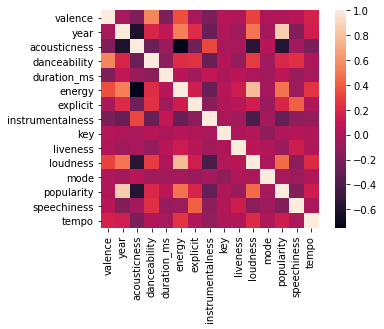

In [22]:
import seaborn as sns
corr=heatmap_data.corr()
ax = sns.heatmap(corr,square=True)

In [23]:
data_x=df["year"]
data_y=df["popularity"]

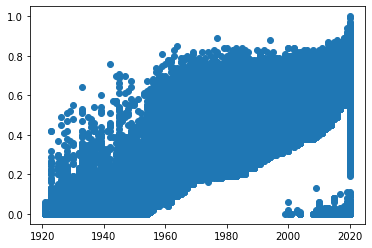

In [24]:
plt.scatter(data_x,data_y)

 Viendo estos dos ultimos gráficos, lo que se nos ocurre es predecir la popularidad de una canción basandonos en algunos de los parámetros de esta. Aunque es importante mencionar que la variable "year" puede llevar a error ya que aunque se vea un aumento de la popularidad en cuanto los años avanzan también hay que tener en cuenta hay muchas mas canciones, y muchas de ellas no llegan a ser populares. En definitiva, las canciones populares son mas populares y las menos populares lo serán menos aún, creemos que se debe a la popularización de internet.

## Hacemos la primera pruba de predicción de popularidad en función de las variables "tempo", "loudness", "energy" y "year" mediante un modelo de regresión lineal.


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

regresion_x=heatmap_data[["tempo","loudness","energy", "year"]]
regresion_y=heatmap_data["popularity"]

X_train, X_test, y_train, y_test = train_test_split(regresion_x, regresion_y, test_size=0.2, random_state=0)


In [26]:
reg = LinearRegression().fit(X_train, y_train)
print("Precisión: "+str(reg.score(X_test, y_test)))

Precisión: 0.7539272410220685


In [27]:
pred=reg.predict(X_test)
for i in range(len(pred[0:50])): 
    pre=pred[i]
    real=y_test.iloc[i]
    print("Popularidad real: "+str(real)+" Popularidad de predicción: "+str(pre))

Popularidad real: 0.5 Popularidad de predicción: 0.5855121358806183
Popularidad real: 0.61 Popularidad de predicción: 0.5119471103331961
Popularidad real: 0.54 Popularidad de predicción: 0.5901602114974107
Popularidad real: 0.29 Popularidad de predicción: 0.356548343926546
Popularidad real: 0.0 Popularidad de predicción: -0.0298679219872362
Popularidad real: 0.09 Popularidad de predicción: 0.11082292317531817
Popularidad real: 0.17 Popularidad de predicción: 0.2122933033539809
Popularidad real: 0.59 Popularidad de predicción: 0.5499866409149607
Popularidad real: 0.68 Popularidad de predicción: 0.5840941128274206
Popularidad real: 0.66 Popularidad de predicción: 0.6198589914330395
Popularidad real: 0.17 Popularidad de predicción: 0.219165946354412
Popularidad real: 0.37 Popularidad de predicción: 0.4949901219933821
Popularidad real: 0.41 Popularidad de predicción: 0.6270527425507915
Popularidad real: 0.49 Popularidad de predicción: 0.562679916221386
Popularidad real: 0.38 Popularidad de

 Si que se ve que la predicción es bastante buena, aún así hay varios aspectos que influyen en la popularidad de una canción que no hemos valorado por lo que este modelo es mejorable, como por ejemplo los artistas, una canción puede tener las mismas propiedades pero si la hace un artista con mayor alcance tendrá mas posibilidades de ser popular. También tiene una gran importancia la variable año, teniendola en cuenta para el modelo se obtiene una precisión de entorno al 75% mientras que si dejamos la variable año fuera del modelo la precisión bajará hasta un 29%.


## Vamos a añadir una columna con la popularidad media de cada uno de los artistas (únicamente cuando son los artistas principales, no contamos las colaboraciones)

In [28]:
"Le añadimos al df una variable mas con el artista principal"
def extraer_artista(cadena):
    cadena=cadena[1:-1]
    return cadena.split(",")[0][1:-1]
lst=[]
for i in df.artists:
  art=extraer_artista(i)
  lst.append(art) 

print(len(lst))
print(len(df))

df["MainArtist"]=lst


170653
170653


In [29]:
"Añadimos una columna al dataframe con la popularidad media de cada artista"
uni=df['MainArtist'].unique()
df["PopAverage"] = np.nan
for el in uni:
  med=df[df["MainArtist"] == el].popularity.mean()
  df.loc[df.MainArtist == el, 'PopAverage'] =med


In [30]:
df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,MainArtist,PopAverage
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",0.04,1921,0.0366,80.954,Sergei Rachmaninoff,0.057640
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,0.05,1921,0.4150,60.936,Dennis Day,0.030000
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,0.913000,3,0.1010,-14.850,1,Gati Bali,0.05,1921,0.0339,110.339,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.024286
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,0.000028,5,0.3810,-9.316,1,Danny Boy,0.03,1921,0.0354,100.109,Frank Parker,0.030000
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,0.02,1921,0.0380,101.665,Phil Regan,0.013333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0.000289,7,0.0822,-3.702,1,China,0.72,2020-05-29,0.0881,105.029,Anuel AA,0.739000
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,0.68,2020-10-23,0.0605,137.936,Ashnikko,0.702500
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,0.000009,4,0.2580,-2.226,0,AYA,0.76,2020-11-03,0.0809,91.688,MAMAMOO,0.734000
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,0.000008,2,0.6430,-7.161,1,Darkness,0.70,2020-01-17,0.3080,75.055,Eminem,0.562391


In [31]:
"Hacemos lo mismo que con el modelo anterior pero esta vez tenemos en cuenta la popularidad media de las canciones de el artista principal"
regresion_x=df[["tempo","loudness","energy", "year", "PopAverage"]]
regresion_y=df["popularity"]

X_train, X_test, y_train, y_test = train_test_split(regresion_x, regresion_y, test_size=0.2, random_state=0)
reg = LinearRegression().fit(X_train, y_train)
print("Precisión: "+str(reg.score(X_test, y_test)))
pred=reg.predict(X_test)
for i in range(len(pred[0:50])): 
    pre=pred[i]
    real=y_test.iloc[i]
    print("Popularidad real: "+str(real)+" Popularidad de predicción: "+str(pre))

Precisión: 0.8355084982106942
Popularidad real: 0.5 Popularidad de predicción: 0.5803128810262619
Popularidad real: 0.61 Popularidad de predicción: 0.49043164161786734
Popularidad real: 0.54 Popularidad de predicción: 0.6331187377185294
Popularidad real: 0.29 Popularidad de predicción: 0.34611728636417904
Popularidad real: 0.0 Popularidad de predicción: -0.021326310093020773
Popularidad real: 0.09 Popularidad de predicción: 0.10928326221766049
Popularidad real: 0.17 Popularidad de predicción: 0.17577883073305234
Popularidad real: 0.59 Popularidad de predicción: 0.6148815595643509
Popularidad real: 0.68 Popularidad de predicción: 0.626363276942091
Popularidad real: 0.66 Popularidad de predicción: 0.6932687535052464
Popularidad real: 0.17 Popularidad de predicción: 0.2674666311344076
Popularidad real: 0.37 Popularidad de predicción: 0.5116129924442756
Popularidad real: 0.41 Popularidad de predicción: 0.5249638414481961
Popularidad real: 0.49 Popularidad de predicción: 0.5440354496435731


## Como se puede ver hay una mejora notable en la precisión del modelo por lo que tener en cuenta la popularidad de el artista ha sido un acierto. La precisión obtenida es muy elevada por lo que creemos qyue se ha cumplido con lo requerido.